# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import requests
import tweepy
import re
import matplotlib.pyplot as plt
import warnings
import time
import json
from timeit import default_timer as timer

In [2]:
# Read the twitter archive csv into a Pandas DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Use requests library to download the tsv file from an url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
# Read the tsv file into a Pandas DataFrame
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# Personal API keys, secrets and tokens (replaced with placeholders)

consumer_key = 'MY CONSUMER KEY'
consumer_secret = 'MY CONSUMER SECRET'
access_token = 'MY ACCESS TOKEN'
access_secret = 'MY ACCESS SECRET'

In [5]:
# Variables created for tweepy query
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open ('tweet_json.txt', 'r')

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'],
                        'favorite_count': tweet[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    'favorite_count'],
                        'display_text_range': tweet['display_text_range']
                       })
    except:
        continue
        
# Create a DataFrame with tweet_id, retweet_id, retweet_count, favorite_count, display_text_range
        
tweet_info = pd.DataFrame(tweets_data, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [7]:
tweet_info = pd.DataFrame(tweets_data, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

In [8]:
tweet_info.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


In [9]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


## Assessing Data


In [10]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Description of `twitter_archive` columns:

* <B>tweet_id</B>: the unique id for each tweet.
* <B>in_reply_to_status_id</B>: if the represented teet is a reply, then this field will contain the integer representation of the original tweet’s ID.
* <B>in_reply_to_user_id</B>: if the represented tweet is a reply, this field will contain the integer representation of the original tweet’s user ID.
* <B>timestamp</B>: the time when a tweet was created.
* <B>source</B>: The source device used to post the tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client.
* <B>text</B>: The actual UTF-8 text of the status update.
* <B>retweeted_status_id</B>: if the represented tweet is a retweet, this field will contain the integer representation of the original tweet’s ID.
* <B>retweeted_status_user_id</B>: if the represented tweet is a retweet, this field will contain the integer representation of the original tweet’s user ID.
* <B>retweeted_status_timestamp</B>: the time of retweet.
* <B>expanded_urls</B>: tweet URL
* <B>rating_numerator</B>: the numerator of the rating of a dog. Note: ratings almost always greater than 10.
* <B>rating_denominator</B>: the denominator of the rating of a dog. Note: ratings almost always have a denominator of 10.
* <B>name</B>: the name of the dog
* <B>doggo</B>: one of the 4 dog stages
* <B>floofer</B>: one of the 4 dog stages
* <B>pupper</B>: one of the 4 dog stages
* <B>puppo</B>: one of the 4 dog stages

In [11]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1786,677573743309385728,NaN,NaN,2015-12-17 19:39:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. He's sexually confused. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677573743...,10,10,Sandy,None,None,None,None
503,813066809284972545,NaN,NaN,2016-12-25 17:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He is disgusted by holiday traffi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813066809...,12,10,Tyr,None,None,None,None
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861288531...,13,10,None,None,None,None,None
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,11,10,Juno,None,None,None,None
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He's addicted to sandwiches (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156...,9,10,Klevin,None,None,None,None


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_archive.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# Based on the above info, check for all values of rating_numerator and rating_denominator

twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [17]:
# Check values for rating_denominator
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [18]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
tweet_info.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
116,870063196459192321,8840,37771,"[0, 140]"
637,793271401113350145,2763,9677,"[0, 118]"
2345,666057090499244032,146,304,"[0, 124]"
410,823269594223824897,11421,0,"[0, 134]"
2165,669359674819481600,134,390,"[0, 139]"


Description of `tweet_info` columns:
* <B>tweet_id</B>: the unique id for each tweet
* <B>retweet_count</B>: the number of times each tweet was retweeted
* <B>favorite_count</B>: the number of times the tweet has been favorited/liked by Twitter users
* <B>display_text_range</B>: an array of two unicode point indices identifying the inclusive start and exclusive end of the displayable content of the tweet



In [23]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### Quality issues
`twitter_archive` table
1. Retweets exists in the table which leads to duplicate counts of tweets.

2. Once retweets are removed from `twitter_archive`, drop the columns 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'.

3. Not all tweet ids which exist in `twitter_archive` exist in `image_predictions`.

4. Erroneous data types used in in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_timestamp. 

5. 'rating_numerator': Very large values which seem unrealistic, for example, 960 and 1776. 

6. 'rating_denominator': Values other than 10 exist (values < 10 and values > 10).

7. 'source' column: HTML tags appear which are unnecessary

8. Erroneous / Incorrect dog names (like 'a', 'an', 'the') with lower case characters

9. 'text' column: Contents are cut-off. 

10. "Breed" column to be added to `twitter_archive`. Fill the column from 'p1_conf' and 'p1_dog' columns from the `image_predictions` table. 

11. Multiple dog stages.

12. Decimal dog ratings.

### Tidiness issues 

1. A new column named "stage" to be created in `twitter_archive`. Dog "stage" variable is stored in four individual columns: 'doggo', 'floofer', 'pupper', 'puppo'. 

2. Join 'retweet_count' and 'favorite_count' from `tweet_info` table to `twitter_archive`.

## Cleaning Data


In [24]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

### Issue #1: Quality
`twitter_archive`: This table contains retweet ids which are duplicates of the original tweets.

#### Define
Retain the original tweets and remove the retweets. Original tweets have the column 'retweeted_status_id' = null.

#### Code

In [25]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [26]:
len(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == False])

0

### Issue #2: Quality

Not all tweet_ids which exist in `twitter_archive` exist in `image_predictions`

#### Define

Retain only the tweet_ids which also exist in the `image_predictions` table

#### Code

In [27]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id.isin(image_predictions.tweet_id)]

#### Test

In [28]:
len(twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(image_predictions.tweet_id)])

0

In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #3: Quality

`twitter_archive`: Erroneous data types in columns 'in_reply_to_status_id', 'in_reply_to_user_id' and 'timestamp'. 

#### Define

* Convert columns <I>'in_reply_to_status_id'</I> & <I>'in_reply_to_user_id'</I> from float to integer data type. 
    * Before we convert the above two columns, we fill the NaN values with 0. 
* Convert column <I>'timestamp'</I> from object to datetime data type.

#### Code

In [30]:
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.fillna(0)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.fillna(0)

twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype(np.int64)
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype(np.int64)

twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](1), flo

### Issue #4: Quality

Rating numerator other than 10. There are some very large values (which seem unrealistic and due to data entry error). Example, 960 & 1776.

#### Define

All records which have a value way higher than 10 in the column <I>'rating_numerator'</I> to be removed from the table `twitter_archive`.

<B> Note: </B>

* Let's define any value greater than 14 as "way higher" in the above "define" statement.

* It was decided to remove these rows since the values will tweak our analysis incorrectly. Alternatively, these values could have been modified to 10. 

#### Code

In [32]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_numerator']<=14]

#### Test

In [33]:
twitter_archive_clean.rating_numerator.value_counts().sort_index()

0       2
1       5
2       9
3      19
4      16
5      33
6      32
7      52
8      95
9     151
10    419
11    396
12    450
13    261
14     35
Name: rating_numerator, dtype: int64

In [34]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1975 non-null int64
in_reply_to_status_id         1975 non-null int64
in_reply_to_user_id           1975 non-null int64
timestamp                     1975 non-null datetime64[ns]
source                        1975 non-null object
text                          1975 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1975 non-null object
rating_numerator              1975 non-null int64
rating_denominator            1975 non-null int64
name                          1975 non-null object
doggo                         1975 non-null object
floofer                       1975 non-null object
pupper                        1975 non-null object
puppo                         1975 non-null object
dtypes: datetime64[ns](1), flo

### Issue #5: Quality

'rating_denominator' has values other than 10. 

#### Define

All records which have a value way higher than 10 in the column <I>'rating_denominator'</I> to be removed from the table `twitter_archive`.


#### Code

In [35]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator']<=10]

#### Test

In [36]:
twitter_archive_clean.rating_denominator.value_counts().sort_index()

2        1
10    1971
Name: rating_denominator, dtype: int64

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1972 non-null int64
in_reply_to_status_id         1972 non-null int64
in_reply_to_user_id           1972 non-null int64
timestamp                     1972 non-null datetime64[ns]
source                        1972 non-null object
text                          1972 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1972 non-null object
rating_numerator              1972 non-null int64
rating_denominator            1972 non-null int64
name                          1972 non-null object
doggo                         1972 non-null object
floofer                       1972 non-null object
pupper                        1972 non-null object
puppo                         1972 non-null object
dtypes: datetime64[ns](1), flo

### Issue #6: Quality

'source' column has unneccessary html tags

#### Define

Retain only the text in between the html tags in the 'source' column and strip all html tags. Then convert the datatype from object (string) to categorical. 

#### Code

In [38]:
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [39]:
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

In [40]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
255,844223788422217728,0,0,2017-03-21 16:26:50,Twitter for iPhone,This is Margo. She just dug pup a massive hole...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844223788...,12,10,Margo,None,None,None,None
131,867051520902168576,0,0,2017-05-23 16:16:06,Twitter for iPhone,"Oh my this spooked me up. We only rate dogs, n...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
730,781661882474196992,0,0,2016-09-30 01:08:10,Twitter for iPhone,Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
353,831309418084069378,0,0,2017-02-14 01:09:44,Twitter for iPhone,This is Scooter and his son Montoya. Scooter ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831309418...,12,10,Scooter,None,None,None,None
1715,680221482581123072,0,0,2015-12-25 03:00:14,Twitter for iPhone,This is CeCe. She's patiently waiting for Sant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680221482...,10,10,CeCe,None,None,None,None


#### Test

In [41]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1934
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### Issue #7: Quality

Erroneous / Incorrect dog names (like 'a', 'an', 'the') with lower case characters

#### Define

Replace all lower case values in column 'name' with 'None'. Then change the 'None' values to NaN. 

#### Code

In [42]:
twitter_archive_clean['name'] [twitter_archive_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
twitter_archive_clean.name[twitter_archive_clean.name == 'None'].value_counts()

None    628
Name: name, dtype: int64

In [44]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None', np.NaN)

#### Test

In [45]:
twitter_archive_clean.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Waffles         3
Walker          1
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Yoda            1
Yogi            2
Zara            1
Zeek            1
Zeke            3
Zeus      

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1972 non-null int64
in_reply_to_status_id         1972 non-null int64
in_reply_to_user_id           1972 non-null int64
timestamp                     1972 non-null datetime64[ns]
source                        1972 non-null category
text                          1972 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1972 non-null object
rating_numerator              1972 non-null int64
rating_denominator            1972 non-null int64
name                          1344 non-null object
doggo                         1972 non-null object
floofer                       1972 non-null object
pupper                        1972 non-null object
puppo                         1972 non-null object
dtypes: category(1), datetim

### Issue #8: Quality

'text' column: Display contents are cut-off. 

#### Define

Display full content of the 'text' column using max column width.

#### Code

In [47]:
pd.set_option('display.max_colwidth', -1)

#### Test

In [48]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2113,670434127938719744,0,0,2015-11-28 02:48:46,Twitter for iPhone,Meet Hank and Sully. Hank is very proud of the pumpkin they found and Sully doesn't give a shit. 11/10 and 8/10 https://t.co/cwoP1ftbrj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670434127938719744/photo/1,11,10,Hank,None,None,None,None
964,750506206503038976,0,0,2016-07-06 01:46:38,Twitter for iPhone,This is Malcolm. He's absolutely terrified of heights. 8/10 hang in there pupper https://t.co/SVU00Sc9U2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750506206503038976/photo/1,8,10,Malcolm,None,None,pupper,None
288,838476387338051585,0,0,2017-03-05 19:48:43,Twitter for iPhone,This is Stanley. Somehow he heard you tell him he's a good boy from all the way up there. 13/10 I love you Stanley https://t.co/51FXNuouHI,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/838476387338051585/photo/1,https://twitter.com/dog_rates/status/838476387338051585/photo/1,https://twitter.com/dog_rates/status/838476387338051585/photo/1",13,10,Stanley,None,None,None,None
2332,666345417576210432,0,0,2015-11-16 20:01:42,Twitter for iPhone,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417576210432/photo/1,10,10,NaN,None,None,None,None
1151,725842289046749185,0,0,2016-04-29 00:21:01,Twitter for iPhone,This is Colby. He's currently regretting all those times he shook your hand for an extra treat. 12/10 https://t.co/vtVHtKFtBH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725842289046749185/photo/1,12,10,Colby,None,None,None,None


### Issue #9: Quality

Create a new column named "breed" in `twitter_archive`.

#### Define
* Create a new column named "breed" in `twitter_archive`.
* For each tweet_id, check if p1_conf (i.e., the confidence interval) is greater than 90% and p1_dog = True (to retain only imgaes predicted as dog breeds). Set the value of p1 in the new column named "breed". 

#### Code

In [49]:
# Create a new column named 'breed'
twitter_archive_clean['breed']='None'

for i, row in twitter_archive_clean.iterrows():
    image_prediction = image_predictions_clean[image_predictions_clean.tweet_id == row.tweet_id]
    p1_conf = image_prediction.p1_conf.iloc[0]
    p1_dog = image_prediction.p1_dog.iloc[0]
    if p1_conf >= 0.90 and p1_dog:
        twitter_archive_clean.set_value(i, 'breed', image_prediction.p1.iloc[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


#### Test

In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      1972 non-null int64
in_reply_to_status_id         1972 non-null int64
in_reply_to_user_id           1972 non-null int64
timestamp                     1972 non-null datetime64[ns]
source                        1972 non-null category
text                          1972 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1972 non-null object
rating_numerator              1972 non-null int64
rating_denominator            1972 non-null int64
name                          1344 non-null object
doggo                         1972 non-null object
floofer                       1972 non-null object
pupper                        1972 non-null object
puppo                         1972 non-null object
breed                       

### Issue #10: Quality

Decimal Dog Ratings. Some observations have decimal ratings. 

#### Define

Extract the decimal ratings using regular expressions.

#### Code

In [51]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5


### Issue #11: Tidiness

#### Define
* A new column named "stage" to be created in `twitter_archive`. 

* Then, convert the datatype from object (string) to categorical. 

#### Code

In [52]:
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

#### Test

In [53]:
twitter_archive_clean.stage.value_counts()

NoneNoneNoneNone        1667
NoneNonepupperNone      202 
doggoNoneNoneNone       63  
NoneNoneNonepuppo       22  
doggoNonepupperNone     9   
NoneflooferNoneNone     7   
doggoNoneNonepuppo      1   
doggoflooferNoneNone    1   
Name: stage, dtype: int64

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      1972 non-null int64
in_reply_to_status_id         1972 non-null int64
in_reply_to_user_id           1972 non-null int64
timestamp                     1972 non-null datetime64[ns]
source                        1972 non-null category
text                          1972 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1972 non-null object
rating_numerator              1972 non-null int64
rating_denominator            1972 non-null int64
name                          1344 non-null object
doggo                         1972 non-null object
floofer                       1972 non-null object
pupper                        1972 non-null object
puppo                         1972 non-null object
breed                       

### Issue #12: Quality


Multiple Dog Stages. There are some rows with multiple dog stages.

#### Define

Handle the "none" values, multiple dog stages and missing values. Set the column to category data type. 

#### Code

In [55]:
# Handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# Handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'


In [56]:
# Handle missing values
twitter_archive_clean.loc[twitter_archive_clean.stage == '', 'stage'] = np.nan

In [57]:
# Set the "stage" column to be categorical
twitter_archive_clean.stage = twitter_archive_clean.stage.astype('category')

#### Test

Visual assessment

### Issue #13: Quality

`twitter_archive` table now contains only original tweets (no retweet data). Drop columns related to retweets.

#### Define

Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns from `twitter_archive` table

#### Code

In [58]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis =1, inplace=True)

#### Test

In [59]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                 1972 non-null int64
in_reply_to_status_id    1972 non-null int64
in_reply_to_user_id      1972 non-null int64
timestamp                1972 non-null datetime64[ns]
source                   1972 non-null category
text                     1972 non-null object
expanded_urls            1972 non-null object
rating_numerator         1972 non-null int64
rating_denominator       1972 non-null int64
name                     1344 non-null object
doggo                    1972 non-null object
floofer                  1972 non-null object
pupper                   1972 non-null object
puppo                    1972 non-null object
breed                    1972 non-null object
stage                    1972 non-null category
dtypes: category(2), datetime64[ns](1), int64(5), object(8)
memory usage: 315.4+ KB


### Issue #14: Tidiness

#### Define

* Add 'retweet_count' and 'favorite_count' from `tweet_info` table to `twitter_archive` table. Join them using 'tweet_id'. 

#### Code

In [60]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_info_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [61]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 30 columns):
tweet_id                 1972 non-null int64
in_reply_to_status_id    1972 non-null int64
in_reply_to_user_id      1972 non-null int64
timestamp                1972 non-null datetime64[ns]
source                   1972 non-null category
text                     1972 non-null object
expanded_urls            1972 non-null object
rating_numerator         1972 non-null int64
rating_denominator       1972 non-null int64
name                     1344 non-null object
doggo                    1972 non-null object
floofer                  1972 non-null object
pupper                   1972 non-null object
puppo                    1972 non-null object
breed                    1972 non-null object
stage                    1972 non-null category
retweet_count            1972 non-null int64
favorite_count           1972 non-null int64
display_text_range       1972 non-null object
jpg_url       

In [63]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
344,817120970343411712,0,0,2017-01-05 21:29:55,Twitter for iPhone,Name a more iconic quartet... I'll wait. 13/10 for all https://t.co/kCLgD8687T,https://twitter.com/dog_rates/status/817120970343411712/photo/1,13,10,NaN,...,1,Saluki,0.568809,True,Afghan_hound,0.229352,True,golden_retriever,0.157130,True
397,807621403335917568,0,0,2016-12-10 16:22:02,Twitter for iPhone,This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie https://t.co/qTRY2qX9y4,"https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1,https://twitter.com/dog_rates/status/807621403335917568/photo/1",14,10,Ollie,...,3,golden_retriever,0.873233,True,cocker_spaniel,0.033693,True,chow,0.020408,True
82,872820683541237760,0,0,2017-06-08 14:20:41,Twitter for iPhone,Here are my favorite #dogsatpollingstations \nMost voted for a more consistent walking schedule and to increase daily pats tenfold. All 13/10 https://t.co/17FVMl4VZ5,"https://twitter.com/dog_rates/status/872820683541237760/photo/1,https://twitter.com/dog_rates/status/872820683541237760/photo/1,https://twitter.com/dog_rates/status/872820683541237760/photo/1,https://twitter.com/dog_rates/status/872820683541237760/photo/1",13,10,NaN,...,3,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True
355,815390420867969024,0,0,2017-01-01 02:53:20,Twitter for iPhone,Happy New Year from the squad! 13/10 for all https://t.co/9njRxyUd5L,https://twitter.com/dog_rates/status/815390420867969024/photo/1,13,10,NaN,...,1,restaurant,0.279846,False,toyshop,0.091429,False,paper_towel,0.046147,False
533,780800785462489090,0,0,2016-09-27 16:06:28,Twitter for iPhone,This is Koda. He has a weird relationship with tall grass. Slightly concerning. 11/10 would def still pet https://t.co/KQzSR8eCsw,"https://twitter.com/dog_rates/status/780800785462489090/photo/1,https://twitter.com/dog_rates/status/780800785462489090/photo/1,https://twitter.com/dog_rates/status/780800785462489090/photo/1",11,10,Koda,...,2,Siberian_husky,0.951963,True,Eskimo_dog,0.035346,True,Pembroke,0.008862,True


In [64]:
twitter_archive_clean.breed.value_counts()

None                              1689
golden_retriever                  36  
Pembroke                          26  
pug                               24  
Samoyed                           21  
Labrador_retriever                16  
Pomeranian                        16  
Chihuahua                         13  
French_bulldog                    12  
chow                              9   
Blenheim_spaniel                  6   
toy_poodle                        5   
American_Staffordshire_terrier    4   
German_shepherd                   4   
Bernese_mountain_dog              4   
Shih-Tzu                          4   
Shetland_sheepdog                 4   
Brittany_spaniel                  4   
vizsla                            4   
Boston_bull                       3   
Pekinese                          3   
Rottweiler                        3   
malamute                          3   
Old_English_sheepdog              3   
beagle                            3   
komondor                 

## Storing Data

In [65]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data

Please note that the analyses and visualizations are based on the data which is cleaned using the steps documented above. 

In [66]:
# Import the necessary packages for visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,7)})

In [67]:
# Create a new DataFrame named "df"
df = twitter_archive_clean.copy()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1972 entries, 0 to 1971
Data columns (total 30 columns):
tweet_id                 1972 non-null int64
in_reply_to_status_id    1972 non-null int64
in_reply_to_user_id      1972 non-null int64
timestamp                1972 non-null datetime64[ns]
source                   1972 non-null category
text                     1972 non-null object
expanded_urls            1972 non-null object
rating_numerator         1972 non-null int64
rating_denominator       1972 non-null int64
name                     1344 non-null object
doggo                    1972 non-null object
floofer                  1972 non-null object
pupper                   1972 non-null object
puppo                    1972 non-null object
breed                    1972 non-null object
stage                    1972 non-null category
retweet_count            1972 non-null int64
favorite_count           1972 non-null int64
display_text_range       1972 non-null object
jpg_url       

In [69]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.972000e+03,1.972000e+03,1.972000e+03,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1.972000e+03,1.972000e+03
mean,7.359935e+17,7.791802e+15,4.682233e+07,10.544118,9.995943,2766.513185,8917.390974,1.203347,0.594026,1.348487e-01,6.018037e-02
std,6.768431e+16,7.351973e+16,4.409295e+08,2.195328,0.180151,4686.683513,12258.925539,0.561517,0.272039,1.008674e-01,5.080513e-02
min,6.660209e+17,0.000000e+00,0.000000e+00,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757713e+17,0.000000e+00,0.000000e+00,10.000000,10.000000,621.750000,1955.250000,1.000000,0.362063,5.411538e-02,1.605498e-02
50%,7.083530e+17,0.000000e+00,0.000000e+00,11.000000,10.000000,1349.500000,4130.500000,1.000000,0.587797,1.184015e-01,4.947920e-02
75%,7.882367e+17,0.000000e+00,0.000000e+00,12.000000,10.000000,3221.000000,11339.750000,1.000000,0.845599,1.956673e-01,9.162278e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,14.000000,10.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


### Insights: Retweets and Favorites Trend Over Time

In [70]:
# Set the index to 'timestamp' for proper display in the graphs below

df.set_index('timestamp', inplace=True)

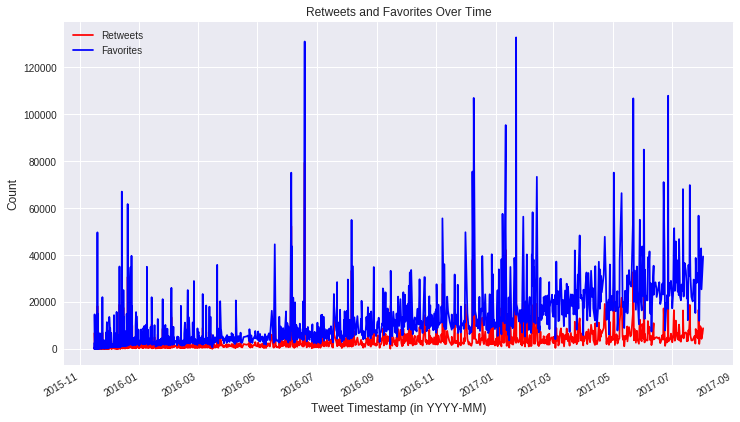

In [71]:
# Create a bar graph showing the trend of retweets and favorites over time

df['retweet_count'].plot(color = 'red', label='Retweets', figsize=(12,7))
df['favorite_count'].plot(color = 'blue', label='Favorites', figsize=(12,7))
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet Timestamp (in YYYY-MM)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Retweets and Favorites Over Time', fontsize=12)
plt.show();

### Insights: Common Twitter Sources

In [72]:
df['source'].value_counts()

Twitter for iPhone    1934
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

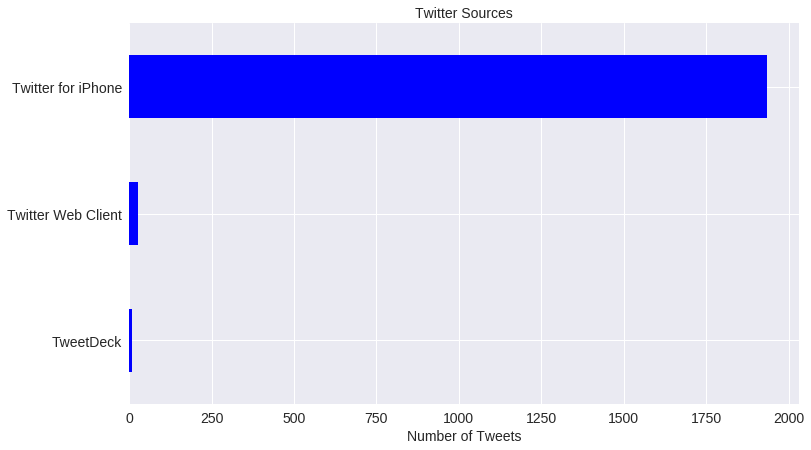

In [73]:
# Create a horozontal bar chart to show the different twitter sources used
df['source'].value_counts().sort_values(ascending=True).plot('barh', color='b', figsize=(12,7), fontsize=14)
plt.title('Twitter Sources',fontsize=14)
plt.xlabel('Number of Tweets', fontsize=14);

### Insights: Top 5 Common Dog Names

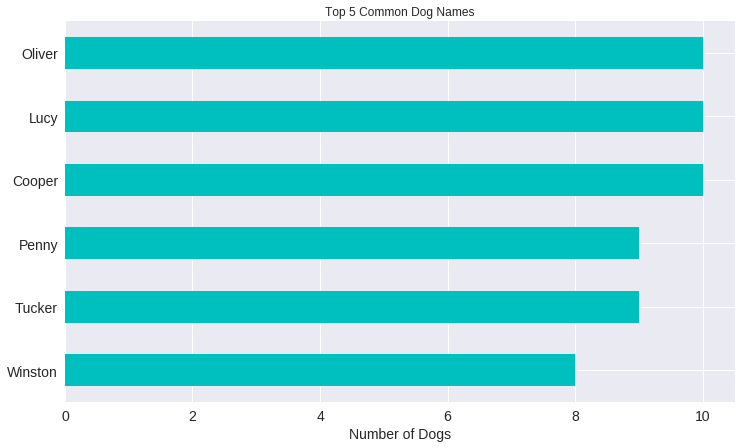

In [74]:
# Create a horizontal bar chart to show the top 5 common dog names
df.name.value_counts()[1:7].sort_values(ascending=True).plot('barh', color='c', figsize=(12,7), title='Top 5 Common Dog Names', fontsize=14).set_xlabel("Number of Dogs", fontsize=14);



Cooper, Oliver, Penny, Tucker and Winston are the top 5 common dog names. 

### Insights: Dog Rating Distribution

In [75]:
df['rating_numerator'].value_counts().sort_index()

0     2  
1     5  
2     9  
3     19 
4     15 
5     33 
6     32 
7     51 
8     95 
9     150
10    419
11    396
12    450
13    261
14    35 
Name: rating_numerator, dtype: int64

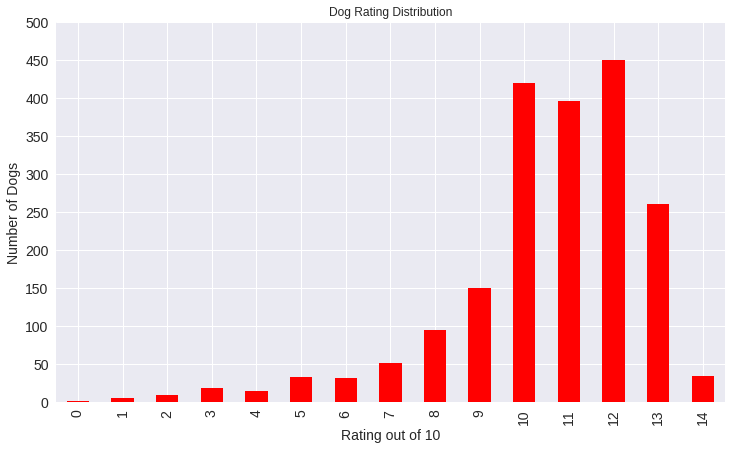

In [76]:
# Create a bar chart to show the dog rating distribution
dist = df.rating_numerator.value_counts().sort_index().plot('bar', color='red', title = 'Dog Rating Distribution', figsize=(12,7), fontsize=14)
dist.set_xlabel("Rating out of 10", fontsize=14)
dist.set_ylabel("Number of Dogs", fontsize=14)
dist.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]);

The dog rating distribution follows normal distribution and skews a bit to the right. 

<B>References</B>

1. https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string